In [1]:
import numpy as np

In [27]:
train_input_data = np.load('/data/workspace/yancheng/MM/Fourier_ID_operator/data/TaxiBJ/train/X_c.npy')
train_output_data = np.load('/data/workspace/yancheng/MM/Fourier_ID_operator/data/TaxiBJ/train/Y.npy')
print("Input train data shape:", train_input_data.shape)
print("Output train data shape:", train_output_data.shape)

train_input_data = train_input_data.reshape(3555, 12, 2, 128, 128)
train_output_data = train_output_data.reshape(3555, 12, 2, 128, 128)
print(train_input_data.shape)
print(train_output_data.shape)

Input train data shape: (3555, 24, 128, 128)
Output train data shape: (3555, 24, 128, 128)
(3555, 12, 2, 128, 128)
(3555, 12, 2, 128, 128)


In [41]:
import numpy as np

# Load the original .npy files
train_input_data = np.load('/data/workspace/yancheng/MM/Fourier_ID_operator/data/TaxiBJ/train/X_c.npy')
train_output_data = np.load('/data/workspace/yancheng/MM/Fourier_ID_operator/data/TaxiBJ/train/Y.npy')

# Reshape the arrays
train_input_data = train_input_data.reshape(3555, 12, 2, 128, 128)
train_output_data = train_output_data.reshape(3555, 12, 2, 128, 128)

# Save the reshaped arrays as new .npy files
np.save('train_input_data_reshaped.npy', train_input_data)
np.save('train_output_data_reshaped.npy', train_output_data)

In [42]:
test_input_data = np.load('/data/workspace/yancheng/MM/Fourier_ID_operator/data/TaxiBJ/test/X_c.npy')
test_output_data = np.load('/data/workspace/yancheng/MM/Fourier_ID_operator/data/TaxiBJ/test/Y.npy')
print("Input test data shape:", test_input_data.shape)
print("Output test data shape:", test_output_data.shape)

test_input_data = test_input_data.reshape(445, 12, 2, 128, 128)
test_output_data = test_output_data.reshape(445, 12, 2, 128, 128)

np.save('test_input_data_reshaped.npy', test_input_data)
np.save('test_output_data_reshaped.npy', test_output_data)

print(test_input_data.shape)
print(test_output_data.shape)

Input test data shape: (445, 24, 128, 128)
Output test data shape: (445, 24, 128, 128)
(445, 12, 2, 128, 128)
(445, 12, 2, 128, 128)


In [43]:
val_input_data = np.load('/data/workspace/yancheng/MM/Fourier_ID_operator/data/TaxiBJ/valid/X_c.npy')
val_output_data = np.load('/data/workspace/yancheng/MM/Fourier_ID_operator/data/TaxiBJ/valid/Y.npy')
print("Input val data shape:", val_input_data.shape)
print("Output val data shape:", val_output_data.shape)

val_input_data = val_input_data.reshape(444, 12, 2, 128, 128)
val_output_data = val_output_data.reshape(444, 12, 2, 128, 128)

np.save('val_input_data_reshaped.npy', val_input_data)
np.save('val_output_data_reshaped.npy', val_output_data)

print(val_input_data.shape)
print(val_output_data.shape)

Input val data shape: (444, 24, 128, 128)
Output val data shape: (444, 24, 128, 128)
(444, 12, 2, 128, 128)
(444, 12, 2, 128, 128)


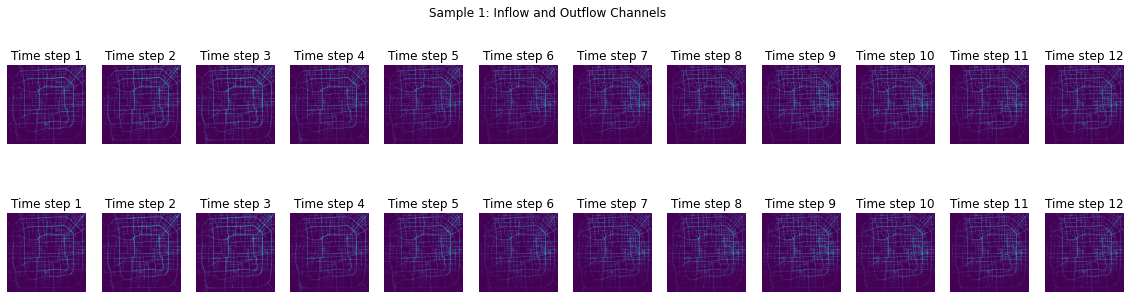

In [3]:
import matplotlib.pyplot as plt

# load the validation output data
val_output_data_reshaped = np.load('/data/workspace/yancheng/MM/Fourier_ID_operator/data/TaxiBJ/val_output_data_reshaped.npy')

# select one sample
sample_idx = 0
inflow_channel = val_output_data_reshaped[sample_idx, :, 0, :, :]
outflow_channel = val_output_data_reshaped[sample_idx, :, 1, :, :]

# plot the inflow and outflow channels for the selected sample
fig, axs = plt.subplots(2, 12, figsize=(20, 5))
for i in range(12):
    axs[0, i].imshow(inflow_channel[i])
    axs[0, i].set_title(f"Time step {i+1}")
    axs[0, i].axis("off")
    
    axs[1, i].imshow(outflow_channel[i])
    axs[1, i].set_title(f"Time step {i+1}")
    axs[1, i].axis("off")

plt.suptitle(f"Sample {sample_idx+1}: Inflow and Outflow Channels")
plt.show()

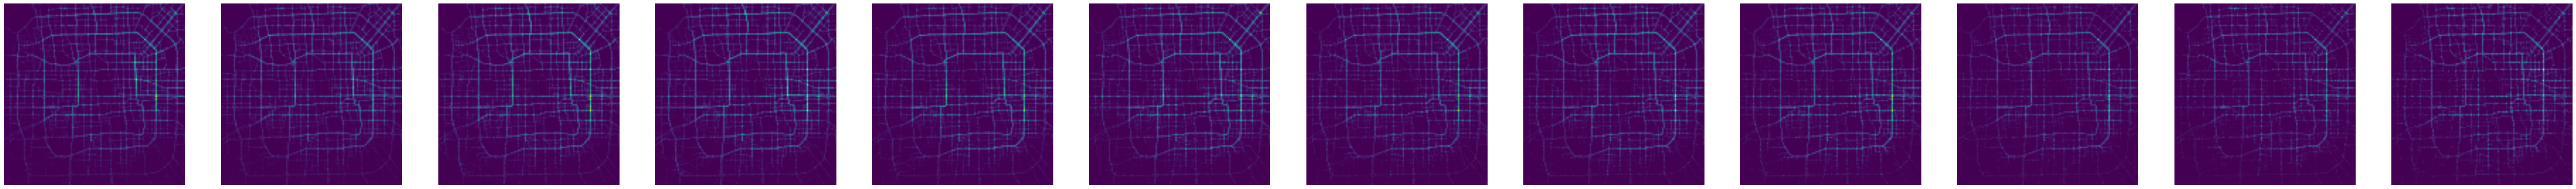

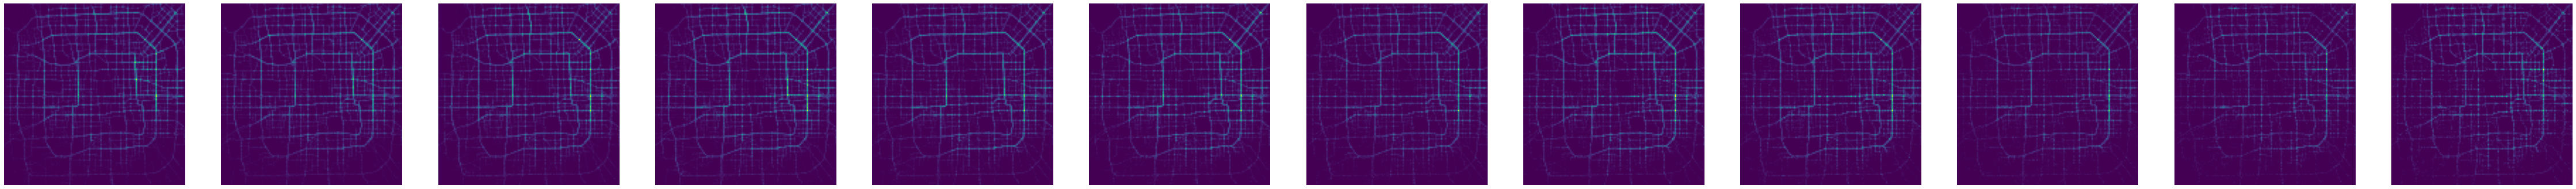

In [24]:
import matplotlib.pyplot as plt

# get the first sample's inflow channel
inflow_channel = train_input_data[2, :, 0, :, :]

# plot the inflow channel for each time step
fig, axs = plt.subplots(1, 12, figsize=(80, 8))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(inflow_channel[i])
    #ax.set_title(f"Time step {i+1}")
    ax.axis("off")

#plt.suptitle("Inflow channel for first sample")
plt.show()


# get the first sample's inflow channel
inflow_channel = train_input_data[2, :, 1, :, :]

# plot the inflow channel for each time step
fig, axs = plt.subplots(1, 12, figsize=(80, 8))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(inflow_channel[i])
    #ax.set_title(f"Time step {i+1}")
    ax.axis("off")

#plt.suptitle("Inflow channel for first sample")
plt.show()

In [37]:
import torch
from torch.utils.data import Dataset, DataLoader

class TaxiBJDataset(torch.utils.data.Dataset):
    def __init__(self, input_data, output_data):
        self.input_data = input_data
        self.output_data = output_data
        self.mean = 0
        self.std = 1
        
    def __len__(self):
        return len(self.input_data)
    
    def __getitem__(self, idx):
        input_sample = self.input_data[idx]
        output_sample = self.output_data[idx]
        return input_sample, output_sample

In [38]:
def load_data(batch_size, val_batch_size, data_root, num_workers):

    train_input_data = np.load(data_root + 'TaxiBJ/train/X_c.npy')
    train_output_data = np.load(data_root + 'TaxiBJ/train/Y.npy')
    train_input_data = train_input_data.reshape(3555, 12, 2, 128, 128)
    train_output_data = train_output_data.reshape(3555, 12, 2, 128, 128)


    test_input_data = np.load(data_root + 'TaxiBJ/test/X_c.npy')
    test_output_data = np.load(data_root + 'TaxiBJ/test/Y.npy')
    test_input_data = test_input_data.reshape(445, 12, 2, 128, 128)
    test_output_data = test_output_data.reshape(445, 12, 2, 128, 128)
    
    val_input_data = np.load(data_root+'TaxiBJ/valid/X_c.npy')
    val_output_data = np.load(data_root+'TaxiBJ/valid/Y.npy')
    val_input_data = val_input_data.reshape(444, 12, 2, 128, 128)
    val_output_data = val_output_data.reshape(444, 12, 2, 128, 128)

    train_set = TaxiBJDataset(train_input_data, train_output_data)
    test_set = TaxiBJDataset(test_input_data, test_output_data)
    val_set = TaxiBJDataset(val_input_data, val_output_data)

    dataloader_train = DataLoader(train_set, batch_size=batch_size, shuffle=True, pin_memory=True, num_workers=num_workers)
    dataloader_test = DataLoader(test_set, batch_size=val_batch_size, shuffle=False, pin_memory=True, num_workers=num_workers)
    dataloader_validation = DataLoader(val_set, batch_size=val_batch_size, shuffle=False, pin_memory=True, num_workers=num_workers)

    mean, std = 0, 1

    return dataloader_train, dataloader_validation, dataloader_test, mean, std
    

In [39]:
dataloader_train, dataloader_validation, dataloader_test, mean, std = load_data(2, 2, '/data/workspace/yancheng/MM/Fourier_ID_operator/data/', 0)

In [40]:
for inputs, outputs in iter(dataloader_train):
    print(inputs.shape, outputs.shape)

torch.Size([2, 12, 2, 128, 128]) torch.Size([2, 12, 2, 128, 128])
torch.Size([2, 12, 2, 128, 128]) torch.Size([2, 12, 2, 128, 128])
torch.Size([2, 12, 2, 128, 128]) torch.Size([2, 12, 2, 128, 128])
torch.Size([2, 12, 2, 128, 128]) torch.Size([2, 12, 2, 128, 128])
torch.Size([2, 12, 2, 128, 128]) torch.Size([2, 12, 2, 128, 128])
torch.Size([2, 12, 2, 128, 128]) torch.Size([2, 12, 2, 128, 128])
torch.Size([2, 12, 2, 128, 128]) torch.Size([2, 12, 2, 128, 128])
torch.Size([2, 12, 2, 128, 128]) torch.Size([2, 12, 2, 128, 128])
torch.Size([2, 12, 2, 128, 128]) torch.Size([2, 12, 2, 128, 128])
torch.Size([2, 12, 2, 128, 128]) torch.Size([2, 12, 2, 128, 128])
torch.Size([2, 12, 2, 128, 128]) torch.Size([2, 12, 2, 128, 128])
torch.Size([2, 12, 2, 128, 128]) torch.Size([2, 12, 2, 128, 128])
torch.Size([2, 12, 2, 128, 128]) torch.Size([2, 12, 2, 128, 128])
torch.Size([2, 12, 2, 128, 128]) torch.Size([2, 12, 2, 128, 128])
torch.Size([2, 12, 2, 128, 128]) torch.Size([2, 12, 2, 128, 128])
torch.Size

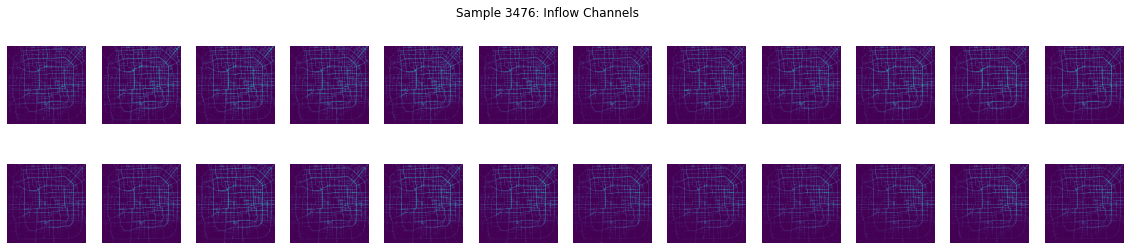

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# load the input and output data
train_input_data_reshaped = np.load('/data/workspace/yancheng/MM/Fourier_ID_operator/data/TaxiBJ/train_input_data_reshaped.npy')
train_output_data_reshaped = np.load('/data/workspace/yancheng/MM/Fourier_ID_operator/data/TaxiBJ/train_output_data_reshaped.npy')

# select one sample index
sample_idx = np.random.randint(low=1, high=3550)

# get the inflow channels for the selected sample from the input and output data
inflow_input = train_input_data_reshaped[sample_idx, :, 0, :, :]
inflow_output = train_output_data_reshaped[sample_idx, :, 0, :, :]

# plot the inflow channels for the selected sample
fig, axs = plt.subplots(2, 12, figsize=(20, 4))
for i in range(12):
    axs[0, i].imshow(inflow_input[i])
    #axs[0, i].set_title(f"Inflow Input Timestep {i+1}")
    axs[0, i].axis("off")
    
    axs[1, i].imshow(inflow_output[i])
    #axs[1, i].set_title(f"Inflow Output Timestep {i+1}")
    axs[1, i].axis("off")

plt.suptitle(f"Sample {sample_idx+1}: Inflow Channels")
plt.show()